#Importing the Tables and storing in DF from GoogleBigQuery

In [ ]:
from pandas.io import gbq
from matplotlib import pyplot as plt
import pandas as pd

In [ ]:
df_activity_u10 = gbq.read_gbq('select * from Students.activity_u10',project_id='ipads2020assignment8')
df_activity_u16 = gbq.read_gbq('select * from Students.activity_u16',project_id='ipads2020assignment8')

In [ ]:
df_stressscale = gbq.read_gbq('select string_field_0,string_field_4	 from Students.stressScale', project_id='ipads2020assignment8')

In [ ]:
df_stressscale.shape

(86, 2)

In [ ]:
df_activity_u10.head()

,timestamp,_activity_inference
0,1.364393e+09,2.0
1,1.364393e+09,2.0
2,1.364406e+09,2.0
3,1.364411e+09,2.0
4,1.364411e+09,2.0


In [ ]:
df_activity_u10.shape

(1062318, 2)

In [ ]:
df_activity_u16.tail()

,timestamp,_activity_inference
981493,1.369810e+09,3.0
981494,1.369823e+09,3.0
981495,1.369823e+09,3.0
981496,1.369823e+09,3.0
981497,1.369823e+09,3.0


In [ ]:
df_activity_u16.shape

(981498, 2)

In [ ]:
df_stressscale.columns

Index(['string_field_0', 'string_field_4'], dtype='object')

In [ ]:
df_stressscale.columns = ['UID', 'In the last month, how often have you felt nervous and "stressed"?']

In [ ]:
df_stressscale.drop(df_stressscale.tail(1).index,inplace=True)

#Task 8.1


##Summary Statistics for Stress

###Overall Students

In [ ]:
print('List of frequency of the students who felt stressful in the last one month : ')
df_stressCounts = df_stressscale['In the last month, how often have you felt nervous and "stressed"?'].value_counts()
print(df_stressCounts)

List of frequency of the students who felt stressful in the last one month : 
Sometime        31
Very often      23
Fairly often    19
Almost never    11
Name: In the last month, how often have you felt nervous and "stressed"?, dtype: int64


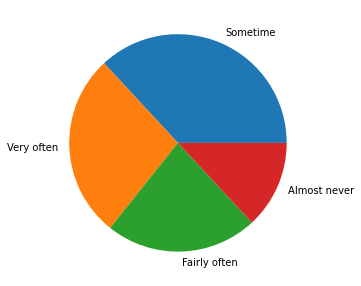

In [ ]:
labels = df_stressCounts.index
counts = df_stressCounts.values
fig, ax = plt.subplots(figsize = (5,5))
ax.pie(counts, labels = labels)
plt.show()

**Conclusion : Most of the students felt stress sometimes, followed by very often and fairly often. Very few students (11) almost never felt stressed out**




###For Students U10 and U16

In [ ]:
gbq.read_gbq('select string_field_4	 from Students.stressScale where string_field_0 = "u10"', project_id='ipads2020assignment8')

,string_field_4
0,Fairly often
1,Fairly often


In [ ]:
gbq.read_gbq('select string_field_4	 from Students.stressScale where string_field_0 = "u16"', project_id='ipads2020assignment8')

,string_field_4
0,Very often
1,Very often


**Conclusion : Student U16 very often felt stressful pre and post intervention where Student U10 fairly often felt stressful**

##Summary Statistics for Activity

###Individual Students

In [ ]:
df_activity_u10['timestamp']=pd.to_datetime(df_activity_u10['timestamp'],unit='s')
df_activity_u16['timestamp']=pd.to_datetime(df_activity_u16['timestamp'],unit='s')
df_activity_u10.dropna(axis=0,inplace = True)
df_activity_u16.dropna(axis=0,inplace = True)

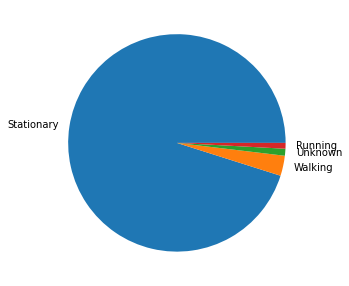

In [ ]:
df_activity_u10_counts = df_activity_u10['_activity_inference'].value_counts()
labels = ['Stationary', 'Walking','Unknown','Running']
counts = df_activity_u10_counts.values
fig, ax = plt.subplots(figsize = (5,5))
ax.pie(counts, labels = labels)
plt.show()

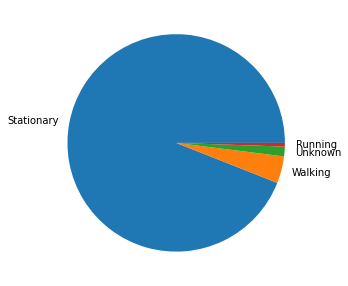

In [ ]:
df_activity_u16_counts = df_activity_u16['_activity_inference'].value_counts()
labels = ['Stationary', 'Walking','Unknown','Running']
counts = df_activity_u16_counts.values
fig, ax = plt.subplots(figsize = (5,5))
ax.pie(counts, labels = labels)
plt.show()

In [ ]:
U10_Stationary = (df_activity_u10['_activity_inference'].value_counts()[0]/df_activity_u10.shape[0])*100
U16_Stationary = (df_activity_u16['_activity_inference'].value_counts()[0]/df_activity_u16.shape[0])*100
U10_Activness = 100 - U10_Stationary
U16_Activness = 100 - U16_Stationary
from tabulate import tabulate
print(tabulate([['U10', U10_Stationary,U10_Activness], ['U16', U16_Stationary,U16_Activness]], headers=['Name', 'Stationary','Activity']))

Name      Stationary    Activity
------  ------------  ----------
U10          95.1169     4.8831
U16          94.0075     5.99247


**CONCLUSION : STUDENT U16 IS MORE ACTIVE THAN U10**

###For Overall Students

In [ ]:
df_activity = pd.concat([df_activity_u10, df_activity_u16])
df_activity.shape

(1021908, 2)

In [ ]:
df_activity['timestamp']=pd.to_datetime(df_activity['timestamp'],unit='s')
df_activity.head()

,timestamp,_activity_inference
0,2013-03-27 13:57:23,2.0
1,2013-03-27 13:57:25,2.0
2,2013-03-27 17:41:30,2.0
3,2013-03-27 18:57:13,2.0
4,2013-03-27 18:57:16,2.0


In [ ]:
print('Students Stationary time (In Percentage) is',(df_activity['_activity_inference'].value_counts()[0]/df_activity.shape[0])*100)

Students Stationary time (In Percentage) is 94.58415043232856


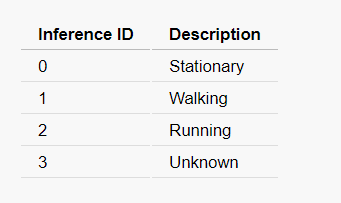

##Performing Time Series Analysis

In [ ]:
from fbprophet import Prophet

In [ ]:
#df_act = df_activity.drop('timestamp', axis=1)
#df_act

In [ ]:
df_activity.columns = ['y', 'ds']

In [ ]:
df_activity

,y,ds
0,2013-03-27 13:57:23,2.0
1,2013-03-27 13:57:25,2.0
2,2013-03-27 17:41:30,2.0
3,2013-03-27 18:57:13,2.0
4,2013-03-27 18:57:16,2.0
...,...,...
981493,2013-05-29 06:40:27,3.0
981494,2013-05-29 10:16:13,3.0
981495,2013-05-29 10:16:24,3.0
981496,2013-05-29 10:16:26,3.0


In [ ]:
df_activity.dropna(axis = 0)

,y,ds
0,2013-03-27 13:57:23,2.0
1,2013-03-27 13:57:25,2.0
2,2013-03-27 17:41:30,2.0
3,2013-03-27 18:57:13,2.0
4,2013-03-27 18:57:16,2.0
...,...,...
981493,2013-05-29 06:40:27,3.0
981494,2013-05-29 10:16:13,3.0
981495,2013-05-29 10:16:24,3.0
981496,2013-05-29 10:16:26,3.0


In [ ]:
#Swapping the Columns 
columns_titles = ["ds","y"] 

df_reorder=df_activity.reindex(columns=columns_titles)
df_reorder

,ds,y
0,2.0,2013-03-27 13:57:23
1,2.0,2013-03-27 13:57:25
2,2.0,2013-03-27 17:41:30
3,2.0,2013-03-27 18:57:13
4,2.0,2013-03-27 18:57:16
...,...,...
981493,3.0,2013-05-29 06:40:27
981494,3.0,2013-05-29 10:16:13
981495,3.0,2013-05-29 10:16:24
981496,3.0,2013-05-29 10:16:26


In [ ]:
df_reorder.dropna(axis = 0, inplace = True)
df_reorder.isna().any()

ds    False
y     False
dtype: bool

In [ ]:
m = Prophet()
m.fit(df_reorder)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future = m.make_future_dataframe(periods = 60)
future.tail()

,ds
59,1970-02-26 00:00:00.000000003
60,1970-02-27 00:00:00.000000003
61,1970-02-28 00:00:00.000000003
62,1970-03-01 00:00:00.000000003
63,1970-03-02 00:00:00.000000003


In [ ]:
forecast = m.predict(df_reorder)
fig1 = m.plot(forecast)

correlation between stress and conversation

In [ ]:

from pandas.io import gbq
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

df_activity_u10 = gbq.read_gbq('select * from Students.activity_u10',project_id='ipads2020assignment8')
df_activity_u16 = gbq.read_gbq('select * from Students.activity_u16',project_id='ipads2020assignment8')

st_list=['u00','u01','u02','u03','u04','u05','u07.','u08','u09','u10']
stress_val_con={'Fairly often':0,'Sometime':1,'Almost never':2,'Very often':3}
df_stressscale = gbq.read_gbq('select string_field_0,string_field_4	 from Students.stressScale where string_field_1="pre" ', project_id='ipads2020assignment8')
file_list=['conversation_u00.csv',
 'conversation_u01.csv',
 'conversation_u02.csv',
 'conversation_u03.csv',
 'conversation_u04.csv',
 'conversation_u05.csv',
 'conversation_u08.csv',
 'conversation_u09.csv',
 'conversation_u10.csv']
avg_list=[]
for table in file_list:
  query='SELECT avg(start_timestamp-_end_timestamp) FROM Students.'+table.split('.')[0]
  temp=gbq.read_gbq(query, project_id='ipads2020assignment8').head()
  avg_list.append([x[1] for x in temp.itertuples()][0])
avg_list
stress_dict={}
for i in df_stressscale.itertuples():
  if i[1] in st_list:
    stress_dict[i[1]]=i[2]
stress_class=[]
for key,val in stress_dict.items():
   stress_dict[key]=stress_val_con[val]
   stress_class.append(stress_val_con[val])
#correlation between stress and conversation
np.corrcoef(avg_list, stress_class)

array([[ 1.        , -0.42761519],
       [-0.42761519,  1.        ]])

In [2]:
from pandas.io import gbq
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
# Importing the required packages 
import numpy as np 
import pandas as pd 
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report

df_activity_u10 = gbq.read_gbq('select * from Students.activity_u10',project_id='ipads2020assignment8')
df_activity_u16 = gbq.read_gbq('select * from Students.activity_u16',project_id='ipads2020assignment8')

st_list=['u00','u01','u02','u03','u04','u05','u07.','u08','u09','u10']
stress_val_con={'Fairly often':0,'Sometime':1,'Almost never':2,'Very often':3}
df_stressscale = gbq.read_gbq('select string_field_0,string_field_4	 from Students.stressScale where string_field_1="pre" ', project_id='ipads2020assignment8')
file_list=['conversation_u00.csv',
 'conversation_u01.csv',
 'conversation_u02.csv',
 'conversation_u03.csv',
 'conversation_u04.csv',
 'conversation_u05.csv',
 'conversation_u08.csv',
 'conversation_u09.csv',
 'conversation_u10.csv']
avg_list=[]
for table in file_list:
  query='SELECT avg(start_timestamp-_end_timestamp) FROM Students.'+table.split('.')[0]
  temp=gbq.read_gbq(query, project_id='ipads2020assignment8').head()
  avg_list.append([x[1] for x in temp.itertuples()][0])
avg_list
stress_dict={}
for i in df_stressscale.itertuples():
  if i[1] in st_list:
    stress_dict[i[1]]=i[2]
stress_class=[]
for key,val in stress_dict.items():
   stress_dict[key]=stress_val_con[val]
   stress_class.append(stress_val_con[val])
#correlation between stress and conversation
np.corrcoef(avg_list, stress_class)

file_list=['phonecharge_u00',
 'phonecharge_u01',
 'phonecharge_u02',
 'phonecharge_u03',
 'phonecharge_u04',
 'phonecharge_u05',
 'phonecharge_u08',
 'phonecharge_u09',
 'phonecharge_u10']
avg_list1=avg_list
avg_list=[]
for table in file_list:
  query='SELECT avg(t.start- t.end) FROM Students.'+table.split('.')[0]+' as t'
  temp=gbq.read_gbq(query, project_id='ipads2020assignment8').head()
  avg_list.append([x[1] for x in temp.itertuples()][0])
avg_list
stress_dict={}
for i in df_stressscale.itertuples():
  if i[1] in st_list:
    stress_dict[i[1]]=i[2]
stress_class=[]
for key,val in stress_dict.items():
   stress_dict[key]=stress_val_con[val]
   stress_class.append(stress_val_con[val])
#correlation between stress and conversation
np.corrcoef(avg_list, stress_class)

file_list=['phonelock_u00',
 'phonelock_u01',
 'phonelock_u02',
 'phonelock_u03',
 'phonelock_u04',
 'phonelock_u05',
 'phonelock_u08',
 'phonelock_u09',
 'phonelock_u10']
avg_list2=avg_list
avg_list=[]
for table in file_list:
  query='SELECT avg(t.start- t.end) FROM Students.'+table.split('.')[0]+' as t'
  temp=gbq.read_gbq(query, project_id='ipads2020assignment8').head()
  avg_list.append([x[1] for x in temp.itertuples()][0])
avg_list
stress_dict={}
for i in df_stressscale.itertuples():
  if i[1] in st_list:
    stress_dict[i[1]]=i[2]
stress_class=[]
for key,val in stress_dict.items():
   stress_dict[key]=stress_val_con[val]
   stress_class.append(stress_val_con[val])
#correlation between stress and conversation
np.corrcoef(avg_list, stress_class)

avg_list2

X=[]
for i, j,k in zip(avg_list1,avg_list2,avg_list):
    X.append([i,j,k])

X=np.array(X)
Y=np.array(stress_class)

X

X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.2, random_state = 100)

# Creating the classifier object 
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,max_depth=1, min_samples_leaf=1)
# Performing training 
clf_gini.fit(X_train, y_train) 
y_pred=clf_gini.predict(X_test)
print("Report : ", 
classification_report(y_test, y_pred))

Report :                precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.50      0.67         2

    accuracy                           0.50         2
   macro avg       0.50      0.25      0.33         2
weighted avg       1.00      0.50      0.67         2



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
